## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.033215
0:	learn: 0.9751839	total: 57.4ms	remaining: 57.4s
1:	learn: 0.9574426	total: 58.3ms	remaining: 29.1s
2:	learn: 0.9367152	total: 59.1ms	remaining: 19.6s
3:	learn: 0.9211290	total: 60ms	remaining: 14.9s
4:	learn: 0.9054945	total: 60.8ms	remaining: 12.1s
5:	learn: 0.8888678	total: 61.8ms	remaining: 10.2s
6:	learn: 0.8749425	total: 62.7ms	remaining: 8.89s
7:	learn: 0.8583165	total: 63.6ms	remaining: 7.89s
8:	learn: 0.8444480	total: 64.5ms	remaining: 7.1s
9:	learn: 0.8295131	total: 65.4ms	remaining: 6.47s
10:	learn: 0.8143641	total: 66.2ms	remaining: 5.95s
11:	learn: 0.8015793	total: 66.9ms	remaining: 5.51s
12:	learn: 0.7866628	total: 67.8ms	remaining: 5.14s
13:	learn: 0.7736735	total: 68.6ms	remaining: 4.83s
14:	learn: 0.7621830	total: 69.5ms	remaining: 4.56s
15:	learn: 0.7497547	total: 70.2ms	remaining: 4.32s
16:	learn: 0.7382153	total: 71ms	remaining: 4.1s
17:	learn: 0.7252135	total: 71.8ms	remaining: 3.92s
18:	learn: 0.7129048	total: 72.6ms	remaining: 3.75

64:	learn: 0.4071516	total: 109ms	remaining: 1.56s
65:	learn: 0.4034143	total: 110ms	remaining: 1.55s
66:	learn: 0.4000459	total: 111ms	remaining: 1.54s
67:	learn: 0.3952238	total: 112ms	remaining: 1.53s
68:	learn: 0.3918899	total: 112ms	remaining: 1.52s
69:	learn: 0.3896314	total: 113ms	remaining: 1.5s
70:	learn: 0.3849728	total: 114ms	remaining: 1.49s
71:	learn: 0.3807709	total: 115ms	remaining: 1.48s
72:	learn: 0.3779960	total: 116ms	remaining: 1.47s
73:	learn: 0.3750587	total: 117ms	remaining: 1.46s
74:	learn: 0.3719523	total: 117ms	remaining: 1.45s
75:	learn: 0.3686902	total: 118ms	remaining: 1.44s
76:	learn: 0.3659721	total: 119ms	remaining: 1.43s
77:	learn: 0.3632471	total: 120ms	remaining: 1.42s
78:	learn: 0.3596566	total: 121ms	remaining: 1.41s
79:	learn: 0.3569076	total: 122ms	remaining: 1.4s
80:	learn: 0.3541963	total: 123ms	remaining: 1.39s
81:	learn: 0.3508450	total: 123ms	remaining: 1.38s
82:	learn: 0.3486219	total: 124ms	remaining: 1.37s
83:	learn: 0.3461826	total: 125ms

164:	learn: 0.2412467	total: 192ms	remaining: 971ms
165:	learn: 0.2403751	total: 193ms	remaining: 968ms
166:	learn: 0.2395836	total: 194ms	remaining: 966ms
167:	learn: 0.2388261	total: 194ms	remaining: 963ms
168:	learn: 0.2382044	total: 195ms	remaining: 959ms
169:	learn: 0.2376101	total: 196ms	remaining: 956ms
170:	learn: 0.2369400	total: 196ms	remaining: 952ms
171:	learn: 0.2359272	total: 197ms	remaining: 949ms
172:	learn: 0.2350584	total: 198ms	remaining: 946ms
173:	learn: 0.2344519	total: 199ms	remaining: 943ms
174:	learn: 0.2338987	total: 199ms	remaining: 939ms
175:	learn: 0.2335517	total: 200ms	remaining: 936ms
176:	learn: 0.2330912	total: 201ms	remaining: 933ms
177:	learn: 0.2324432	total: 202ms	remaining: 931ms
178:	learn: 0.2318215	total: 202ms	remaining: 928ms
179:	learn: 0.2311458	total: 203ms	remaining: 926ms
180:	learn: 0.2305402	total: 204ms	remaining: 923ms
181:	learn: 0.2297967	total: 205ms	remaining: 921ms
182:	learn: 0.2291036	total: 206ms	remaining: 918ms
183:	learn: 

292:	learn: 0.1734428	total: 299ms	remaining: 722ms
293:	learn: 0.1728355	total: 300ms	remaining: 720ms
294:	learn: 0.1722477	total: 301ms	remaining: 719ms
295:	learn: 0.1715570	total: 302ms	remaining: 717ms
296:	learn: 0.1711931	total: 303ms	remaining: 716ms
297:	learn: 0.1709514	total: 303ms	remaining: 715ms
298:	learn: 0.1706379	total: 304ms	remaining: 713ms
299:	learn: 0.1704813	total: 305ms	remaining: 712ms
300:	learn: 0.1701726	total: 306ms	remaining: 710ms
301:	learn: 0.1697747	total: 307ms	remaining: 709ms
302:	learn: 0.1696326	total: 307ms	remaining: 707ms
303:	learn: 0.1693348	total: 308ms	remaining: 706ms
304:	learn: 0.1690649	total: 309ms	remaining: 704ms
305:	learn: 0.1686191	total: 310ms	remaining: 703ms
306:	learn: 0.1683421	total: 311ms	remaining: 702ms
307:	learn: 0.1680008	total: 312ms	remaining: 700ms
308:	learn: 0.1674413	total: 312ms	remaining: 699ms
309:	learn: 0.1670046	total: 313ms	remaining: 697ms
310:	learn: 0.1665081	total: 314ms	remaining: 696ms
311:	learn: 

393:	learn: 0.1432088	total: 382ms	remaining: 588ms
394:	learn: 0.1429904	total: 383ms	remaining: 587ms
395:	learn: 0.1424467	total: 384ms	remaining: 585ms
396:	learn: 0.1423742	total: 384ms	remaining: 584ms
397:	learn: 0.1419509	total: 385ms	remaining: 583ms
398:	learn: 0.1417721	total: 386ms	remaining: 582ms
399:	learn: 0.1416100	total: 387ms	remaining: 581ms
400:	learn: 0.1413861	total: 388ms	remaining: 579ms
401:	learn: 0.1409364	total: 389ms	remaining: 578ms
402:	learn: 0.1405350	total: 389ms	remaining: 577ms
403:	learn: 0.1404003	total: 390ms	remaining: 576ms
404:	learn: 0.1401231	total: 391ms	remaining: 575ms
405:	learn: 0.1396141	total: 392ms	remaining: 574ms
406:	learn: 0.1395356	total: 393ms	remaining: 572ms
407:	learn: 0.1392007	total: 394ms	remaining: 571ms
408:	learn: 0.1388364	total: 394ms	remaining: 570ms
409:	learn: 0.1385960	total: 395ms	remaining: 568ms
410:	learn: 0.1384936	total: 396ms	remaining: 567ms
411:	learn: 0.1383268	total: 397ms	remaining: 566ms
412:	learn: 

521:	learn: 0.1114733	total: 489ms	remaining: 448ms
522:	learn: 0.1112288	total: 490ms	remaining: 447ms
523:	learn: 0.1111005	total: 491ms	remaining: 446ms
524:	learn: 0.1109181	total: 491ms	remaining: 445ms
525:	learn: 0.1108383	total: 492ms	remaining: 444ms
526:	learn: 0.1105920	total: 493ms	remaining: 443ms
527:	learn: 0.1104574	total: 494ms	remaining: 442ms
528:	learn: 0.1100880	total: 495ms	remaining: 441ms
529:	learn: 0.1098181	total: 496ms	remaining: 439ms
530:	learn: 0.1096356	total: 496ms	remaining: 439ms
531:	learn: 0.1095569	total: 497ms	remaining: 437ms
532:	learn: 0.1093849	total: 498ms	remaining: 436ms
533:	learn: 0.1092195	total: 499ms	remaining: 435ms
534:	learn: 0.1088903	total: 500ms	remaining: 434ms
535:	learn: 0.1086672	total: 500ms	remaining: 433ms
536:	learn: 0.1085424	total: 501ms	remaining: 432ms
537:	learn: 0.1082645	total: 502ms	remaining: 431ms
538:	learn: 0.1079690	total: 503ms	remaining: 430ms
539:	learn: 0.1078355	total: 504ms	remaining: 429ms
540:	learn: 

623:	learn: 0.0936115	total: 572ms	remaining: 345ms
624:	learn: 0.0933917	total: 573ms	remaining: 344ms
625:	learn: 0.0932455	total: 574ms	remaining: 343ms
626:	learn: 0.0931755	total: 575ms	remaining: 342ms
627:	learn: 0.0929653	total: 575ms	remaining: 341ms
628:	learn: 0.0927444	total: 576ms	remaining: 340ms
629:	learn: 0.0925737	total: 577ms	remaining: 339ms
630:	learn: 0.0924839	total: 578ms	remaining: 338ms
631:	learn: 0.0923886	total: 579ms	remaining: 337ms
632:	learn: 0.0922665	total: 579ms	remaining: 336ms
633:	learn: 0.0921378	total: 580ms	remaining: 335ms
634:	learn: 0.0920290	total: 581ms	remaining: 334ms
635:	learn: 0.0918951	total: 582ms	remaining: 333ms
636:	learn: 0.0916952	total: 583ms	remaining: 332ms
637:	learn: 0.0915855	total: 583ms	remaining: 331ms
638:	learn: 0.0913904	total: 584ms	remaining: 330ms
639:	learn: 0.0911785	total: 585ms	remaining: 329ms
640:	learn: 0.0910397	total: 586ms	remaining: 328ms
641:	learn: 0.0908247	total: 587ms	remaining: 327ms
642:	learn: 

754:	learn: 0.0761720	total: 680ms	remaining: 221ms
755:	learn: 0.0760869	total: 681ms	remaining: 220ms
756:	learn: 0.0760282	total: 681ms	remaining: 219ms
757:	learn: 0.0759197	total: 682ms	remaining: 218ms
758:	learn: 0.0757833	total: 683ms	remaining: 217ms
759:	learn: 0.0756438	total: 684ms	remaining: 216ms
760:	learn: 0.0754971	total: 685ms	remaining: 215ms
761:	learn: 0.0754098	total: 686ms	remaining: 214ms
762:	learn: 0.0753550	total: 687ms	remaining: 213ms
763:	learn: 0.0752791	total: 687ms	remaining: 212ms
764:	learn: 0.0750824	total: 688ms	remaining: 211ms
765:	learn: 0.0749592	total: 689ms	remaining: 210ms
766:	learn: 0.0747459	total: 690ms	remaining: 210ms
767:	learn: 0.0746568	total: 691ms	remaining: 209ms
768:	learn: 0.0745393	total: 692ms	remaining: 208ms
769:	learn: 0.0744369	total: 693ms	remaining: 207ms
770:	learn: 0.0743178	total: 693ms	remaining: 206ms
771:	learn: 0.0742415	total: 694ms	remaining: 205ms
772:	learn: 0.0741173	total: 695ms	remaining: 204ms
773:	learn: 

852:	learn: 0.0658894	total: 762ms	remaining: 131ms
853:	learn: 0.0657905	total: 763ms	remaining: 131ms
854:	learn: 0.0657185	total: 764ms	remaining: 130ms
855:	learn: 0.0656478	total: 765ms	remaining: 129ms
856:	learn: 0.0655179	total: 766ms	remaining: 128ms
857:	learn: 0.0654699	total: 767ms	remaining: 127ms
858:	learn: 0.0653402	total: 767ms	remaining: 126ms
859:	learn: 0.0651857	total: 768ms	remaining: 125ms
860:	learn: 0.0650713	total: 769ms	remaining: 124ms
861:	learn: 0.0650369	total: 770ms	remaining: 123ms
862:	learn: 0.0650098	total: 771ms	remaining: 122ms
863:	learn: 0.0649334	total: 771ms	remaining: 121ms
864:	learn: 0.0648134	total: 772ms	remaining: 121ms
865:	learn: 0.0646806	total: 774ms	remaining: 120ms
866:	learn: 0.0645525	total: 774ms	remaining: 119ms
867:	learn: 0.0644622	total: 775ms	remaining: 118ms
868:	learn: 0.0643305	total: 776ms	remaining: 117ms
869:	learn: 0.0643068	total: 777ms	remaining: 116ms
870:	learn: 0.0641838	total: 778ms	remaining: 115ms
871:	learn: 

980:	learn: 0.0554845	total: 871ms	remaining: 16.9ms
981:	learn: 0.0554335	total: 871ms	remaining: 16ms
982:	learn: 0.0553997	total: 873ms	remaining: 15.1ms
983:	learn: 0.0553316	total: 874ms	remaining: 14.2ms
984:	learn: 0.0551918	total: 875ms	remaining: 13.3ms
985:	learn: 0.0551745	total: 875ms	remaining: 12.4ms
986:	learn: 0.0550842	total: 876ms	remaining: 11.5ms
987:	learn: 0.0550042	total: 877ms	remaining: 10.7ms
988:	learn: 0.0549094	total: 878ms	remaining: 9.76ms
989:	learn: 0.0548443	total: 879ms	remaining: 8.88ms
990:	learn: 0.0547935	total: 879ms	remaining: 7.99ms
991:	learn: 0.0547309	total: 880ms	remaining: 7.1ms
992:	learn: 0.0546476	total: 881ms	remaining: 6.21ms
993:	learn: 0.0545956	total: 882ms	remaining: 5.32ms
994:	learn: 0.0545684	total: 883ms	remaining: 4.43ms
995:	learn: 0.0545021	total: 883ms	remaining: 3.55ms
996:	learn: 0.0544457	total: 884ms	remaining: 2.66ms
997:	learn: 0.0543802	total: 885ms	remaining: 1.77ms
998:	learn: 0.0543429	total: 886ms	remaining: 886

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

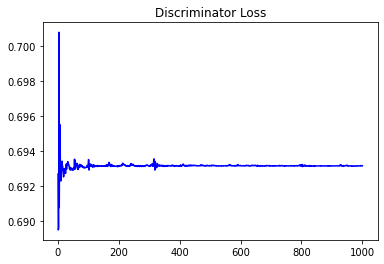

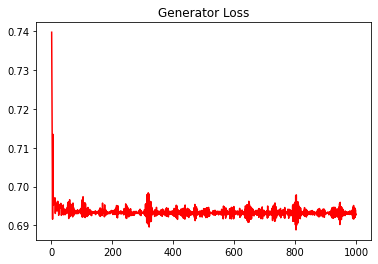

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.09636823118246987


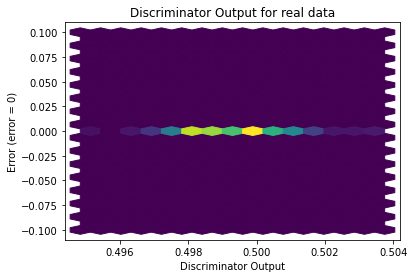

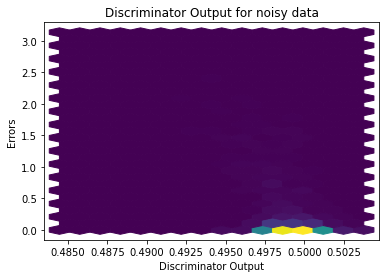

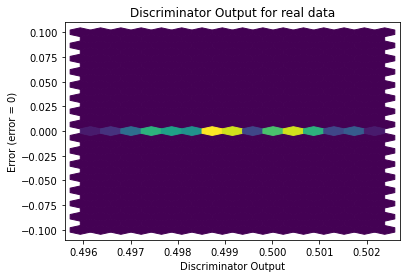

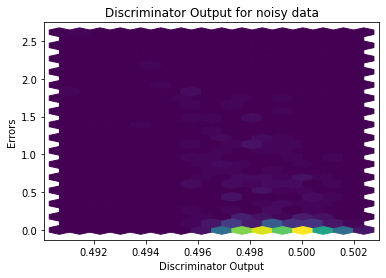

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


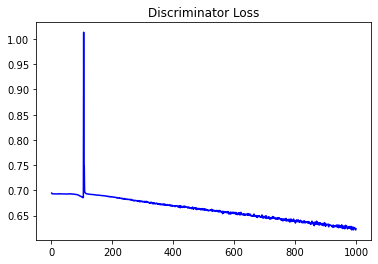

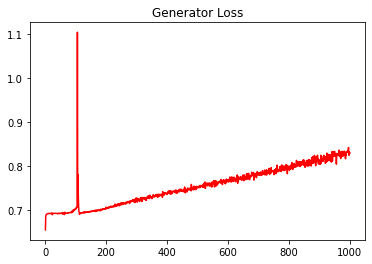

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.09148207014646532


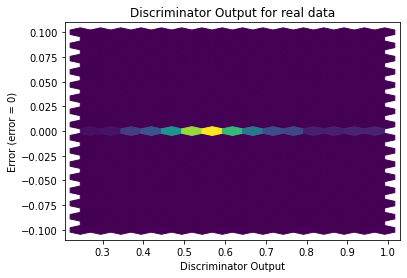

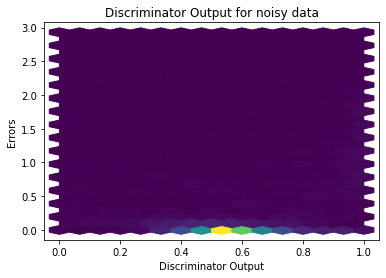

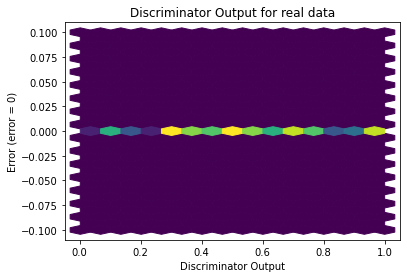

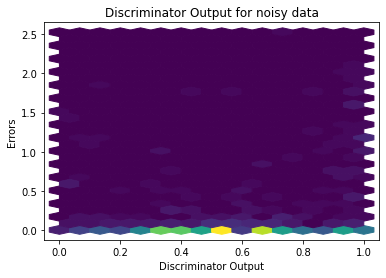

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.]], requires_grad=True)
